## Importacion de Librerias y Carga de Datos

In [1]:
# importacion de librerias

import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("propiedades_scrapeadas_casas.csv")

df.head(5)

,url,precio,Dormitorios,Baños,Superficie,Superficie Construida,Superficie Terreno,Dormitorios Suite,Garage,Parrillero,Calefacción,Orientación,Popiedad Horizontal,Plantas,Cocina,Año de Construcción,Jardín,Acepta Mascotas,Gastos Comúnes,Piscina,Seguridad,Disposición,Superficie Balcones,Dormitorios Servicio,Pisos Edificio,Patio,Muebles,Altura,Aptos por piso,Lavadero
0,https://www.casasymas.com.uy/propiedad/163085-...,U$S 365.000Venta,3,3.0,156 m²,112m²,156m²,Dormitorios en Suite: 1,Cochera: 1,Parrillero,Estufa alto rendimiento y Aires,Norte,Popiedad Horizontal,2.0,Cocina Definida,2025.0,Jardín,Acepta Mascotas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.casasymas.com.uy/propiedad/156902-...,U$S 180.000Venta,2,1.0,171 m²,121m²,50m²,NaN,Garaje: 1,NaN,NaN,Este,NaN,NaN,Cocina Definida,1960.0,Jardín,Acepta Mascotas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.casasymas.com.uy/propiedad/53311-c...,U$S 350.000Venta,3,3.0,1183 m²,180m²,1183m²,Dormitorios en Suite: 1,NaN,NaN,NaN,NaN,NaN,NaN,Cocina Definida,NaN,NaN,NaN,$U 11000,Piscina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.casasymas.com.uy/propiedad/190507-...,U$S 172.000Venta,3,2.0,498 m²,150m²,498m²,NaN,Garaje: 1,Parrillero,NaN,Oeste,NaN,1.0,Cocina Definida,1943.0,Jardín,Acepta Mascotas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.casasymas.com.uy/propiedad/183830-...,U$S 490.000Venta,3,5.0,367 m²,244m²,123m²,NaN,Garaje: 2,NaN,NaN,Oeste,NaN,NaN,Cocina Definida,NaN,Jardín,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
valores_unicos_calefaccion = df['Calefacción'].unique()
print("Valores únicos en la columna 'Cocina':", valores_unicos_calefaccion)

Valores únicos en la columna 'Cocina': ['Estufa alto rendimiento y Aires' nan 'Losa radiante'
 'Aire Acondicionado' 'Losa Radiante Eléctrica' 'Hogar'
 'Aire acondicionado' 'Estufa a leña - Calefacción' 'Gas oil'
 'Estufa a leña' 'estufa' 'aire acondicionado y estufa' 'LOSA RADIANTE'
 'Aire acondicionado, estufa a leña.'
 'Losa Radiante / Bomba de calor / AA'
 'estufa a leña estufa grande de alto rendimiento. Aire acodicionado'
 'Radiadores a gas o bomba de calor' 'estufa a leña y aire acondicionado'
 'Calefacción a gas' 'Losa' 'Losa y Radiadores' 'radiadores por gas'
 'Bomba a gasoil nueva' 'estufa, aire a. y losa' 'A/A'
 'Losa radiante a gas' 'Radiadores a gas' 'losa individual eléctrica'
 'Estufa a leña , Estufa a leña' 'Estufa Leña' 'Estufa a Leña'
 'Radiadores y losa' 'bomba de calor' 'Radiadores'
 'Central por radiadores'
 'Calefacción central a gas, Estufa de alto rendimiento'
 'Calefacción central con caldera, calefactor y estufa de leña'
 'losa radiante - bomba de calor' 'Losa 

# Limpieza de datos

## Eliminamos duplicados del dataset

In [4]:
# vemos los duplicados que hay en el dataset 

duplicados = df.duplicated()
print(f'Duplicados encontrados: {duplicados.sum()}')

Duplicados encontrados: 564


In [5]:
# dropeamos los duplicados del dataset por url 

df = df.drop_duplicates(subset='url')

In [6]:
df.head()

,url,precio,Dormitorios,Baños,Superficie,Superficie Construida,Superficie Terreno,Dormitorios Suite,Garage,Parrillero,Calefacción,Orientación,Popiedad Horizontal,Plantas,Cocina,Año de Construcción,Jardín,Acepta Mascotas,Gastos Comúnes,Piscina,Seguridad,Disposición,Superficie Balcones,Dormitorios Servicio,Pisos Edificio,Patio,Muebles,Altura,Aptos por piso,Lavadero
0,https://www.casasymas.com.uy/propiedad/163085-...,U$S 365.000Venta,3,3.0,156 m²,112m²,156m²,Dormitorios en Suite: 1,Cochera: 1,Parrillero,Estufa alto rendimiento y Aires,Norte,Popiedad Horizontal,2.0,Cocina Definida,2025.0,Jardín,Acepta Mascotas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.casasymas.com.uy/propiedad/156902-...,U$S 180.000Venta,2,1.0,171 m²,121m²,50m²,NaN,Garaje: 1,NaN,NaN,Este,NaN,NaN,Cocina Definida,1960.0,Jardín,Acepta Mascotas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.casasymas.com.uy/propiedad/53311-c...,U$S 350.000Venta,3,3.0,1183 m²,180m²,1183m²,Dormitorios en Suite: 1,NaN,NaN,NaN,NaN,NaN,NaN,Cocina Definida,NaN,NaN,NaN,$U 11000,Piscina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.casasymas.com.uy/propiedad/190507-...,U$S 172.000Venta,3,2.0,498 m²,150m²,498m²,NaN,Garaje: 1,Parrillero,NaN,Oeste,NaN,1.0,Cocina Definida,1943.0,Jardín,Acepta Mascotas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.casasymas.com.uy/propiedad/183830-...,U$S 490.000Venta,3,5.0,367 m²,244m²,123m²,NaN,Garaje: 2,NaN,NaN,Oeste,NaN,NaN,Cocina Definida,NaN,Jardín,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# ver columnas del dataset 

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1024 entries, 0 to 1587
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   url                    1024 non-null   object 
 1   precio                 1017 non-null   object 
 2   Dormitorios            1017 non-null   object 
 3   Baños                  990 non-null    float64
 4   Superficie             918 non-null    object 
 5   Superficie Construida  924 non-null    object 
 6   Superficie Terreno     773 non-null    object 
 7   Dormitorios Suite      250 non-null    object 
 8   Garage                 701 non-null    object 
 9   Parrillero             256 non-null    object 
 10  Calefacción            144 non-null    object 
 11  Orientación            523 non-null    object 
 12  Popiedad Horizontal    104 non-null    object 
 13  Plantas                368 non-null    float64
 14  Cocina                 682 non-null    object 
 15  Año de Co

## Limpieza de campos 

Algunos campos tienen incoherencias entonces queremos dejarlos lo mas limpio posibles para nuestro analisis. 

In [8]:
# columna "precio" -> eliminamos el "U$S" y "Venta"

df['precio'] = df['precio'].str.replace("U\\$S", "", regex=True)
df['precio'] = df['precio'].str.replace("Venta", "", regex=True)
df['precio'] = df['precio'].str.replace(".", "", regex=False)
df['precio'] = df['precio'].str.strip()
df['precio'] = pd.to_numeric(df['precio'], errors='coerce')

print(df['precio'].head())

0    365000.0
1    180000.0
2    350000.0
3    172000.0
4    490000.0
Name: precio, dtype: float64


In [9]:
# columna "Gastos Comúnes" -> sacar "$U", "UYU", "U$S"

df['Gastos Comúnes'] = df['Gastos Comúnes'].str.replace("U\\$S", "", regex=True)
df['Gastos Comúnes'] = df['Gastos Comúnes'].str.replace("$U", "", regex=True)
df['Gastos Comúnes'] = df['Gastos Comúnes'].str.replace("UYU", "", regex=True)
df['Gastos Comúnes'] = df['Gastos Comúnes'].str.strip()
df['Gastos Comúnes'] = pd.to_numeric(df['Gastos Comúnes'], errors='coerce')


In [10]:
# columna "dormitorio" -> cambiamos "Monoambiente" por 0. 

df['Dormitorios'] = df['Dormitorios'].replace("Monoambiente", 0)
df['Dormitorio'] = pd.to_numeric(df['Dormitorios'], errors='coerce')

In [11]:
# columna "Superficie" -> sacamos "mÂ²", dejando solo el numero 

df['Superficie'] = df['Superficie'].str.replace("mÂ²", "", regex=False)
df['Superficie'] = df['Superficie'].str.replace("m²", "", regex=False)

# eliminar espacios 

df['Superficie'] = df["Superficie"].str.strip()

# convertir a numero 

df['Superficie'] = pd.to_numeric(df['Superficie'], errors='coerce')

In [12]:
# columna "Superficie Construida" -> sacamos "mÂ²" y "m²", dejando solo el numero 

df['Superficie Construida'] = df['Superficie Construida'].str.replace("mÂ²", "", regex=False)
df['Superficie Construida'] = df['Superficie Construida'].str.replace("m²", "", regex=False)

# eliminar espacios 

df['Superficie Construida'] = df["Superficie Construida"].str.strip()

# convertir a numero 

df['Superficie Construida'] = pd.to_numeric(df['Superficie Construida'], errors='coerce')

In [13]:
# columna "Superficie Terreno" -> sacamos "mÂ²" y "m²", dejando solo el numero 

df['Superficie Terreno'] = df['Superficie Terreno'].str.replace("mÂ²", "", regex=False)
df['Superficie Terreno'] = df['Superficie Terreno'].str.replace("m²", "", regex=False)

# eliminar espacios 

df['Superficie Terreno'] = df["Superficie Terreno"].str.strip()

# convertir a numero 

df['Superficie Terreno'] = pd.to_numeric(df['Superficie Terreno'], errors='coerce')

In [14]:
# columna "Superficie Balcones" -> sacamos "mÂ²" y "m²", dejando solo el numero 

df['Superficie Balcones'] = df['Superficie Balcones'].str.replace("mÂ²", "", regex=False)
df['Superficie Balcones'] = df['Superficie Balcones'].str.replace("m²", "", regex=False)

# eliminar espacios 

df['Superficie Balcones'] = df["Superficie Balcones"].str.strip()

# convertir a numero 

df['Superficie Balcones'] = pd.to_numeric(df['Superficie Balcones'], errors='coerce')

In [15]:
# columna "Dormitorios Servicio" -> dejar solo el numero en vez de "Dormitorios de servicio: 1" que quede "1" (float)

# Reemplazar vacíos o NaN por 0
df['Dormitorios Servicio'] = df['Dormitorios Servicio'].fillna(0)

# Extraer solo el número
df['Dormitorios Servicio'] = df['Dormitorios Servicio'].astype(str).str.extract('(\d+)')

# Reemplazar cualquier valor faltante con 0 y convertir a número
df['Dormitorios Servicio'] = df['Dormitorios Servicio'].fillna(0).astype(int)



<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Felipe\AppData\Local\Temp\ipykernel_46164\2990161827.py:7: SyntaxWarning: invalid escape sequence '\d'
  df['Dormitorios Servicio'] = df['Dormitorios Servicio'].astype(str).str.extract('(\d+)')


In [16]:
# columna "Dormitorios Suite" -> dejar solo el numero en vez de "Dormitorios en suite: 1" que quede "1" (float)

# Reemplazar vacíos o NaN por 0
df['Dormitorios Suite'] = df['Dormitorios Suite'].fillna(0)

# Extraer solo el número
df['Dormitorios Suite'] = df['Dormitorios Suite'].astype(str).str.extract('(\d+)')

# Reemplazar cualquier valor faltante con 0 y convertir a número
df['Dormitorios Suite'] = df['Dormitorios Suite'].fillna(0).astype(int)

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Felipe\AppData\Local\Temp\ipykernel_46164\2890901075.py:7: SyntaxWarning: invalid escape sequence '\d'
  df['Dormitorios Suite'] = df['Dormitorios Suite'].astype(str).str.extract('(\d+)')


In [17]:
# columna "Garage" -> dejar solo el numero en vez de "Dormitorios en suite: 1" que quede "1" (float)

# Reemplazar vacíos o NaN por 0
df['Garage'] = df['Garage'].fillna(0)

# Extraer solo el número
df['Garage'] = df['Garage'].astype(str).str.extract('(\d+)')

# Reemplazar cualquier valor faltante con 0 y convertir a número
df['Garage'] = df['Garage'].fillna(0).astype(int)

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Felipe\AppData\Local\Temp\ipykernel_46164\4138919070.py:7: SyntaxWarning: invalid escape sequence '\d'
  df['Garage'] = df['Garage'].astype(str).str.extract('(\d+)')


In [18]:
# columna "Altura" -> pasamos de "3m" a "3"

# Quitar la letra "m" y espacios
df['Altura'] = df['Altura'].str.replace("m", "", regex=False)
df['Altura'] = df['Altura'].str.strip()

# Convertir a número
df['Altura'] = pd.to_numeric(df['Altura'], errors='coerce')

In [19]:
# drop de filas con NaN en precio

df = df[df['precio'].notna()]

In [20]:
# chequeamos que no quede nada con NaN en precio

df[df['precio'].isna()]

,url,precio,Dormitorios,Baños,Superficie,Superficie Construida,Superficie Terreno,Dormitorios Suite,Garage,Parrillero,Calefacción,Orientación,Popiedad Horizontal,Plantas,Cocina,Año de Construcción,Jardín,Acepta Mascotas,Gastos Comúnes,Piscina,Seguridad,Disposición,Superficie Balcones,Dormitorios Servicio,Pisos Edificio,Patio,Muebles,Altura,Aptos por piso,Lavadero,Dormitorio


In [21]:
df[df['Aptos por piso'].notna()]

,url,precio,Dormitorios,Baños,Superficie,Superficie Construida,Superficie Terreno,Dormitorios Suite,Garage,Parrillero,Calefacción,Orientación,Popiedad Horizontal,Plantas,Cocina,Año de Construcción,Jardín,Acepta Mascotas,Gastos Comúnes,Piscina,Seguridad,Disposición,Superficie Balcones,Dormitorios Servicio,Pisos Edificio,Patio,Muebles,Altura,Aptos por piso,Lavadero,Dormitorio
39,https://www.casasymas.com.uy/propiedad/175617-...,165000.0,2,1.0,80.0,70.0,80.0,0,0,NaN,NaN,NaN,NaN,NaN,Cocina Definida,1960.0,NaN,NaN,4500.0,NaN,NaN,NaN,NaN,0,NaN,Patio,NaN,3.0,1.0,Lavadero,2.0
43,https://www.casasymas.com.uy/propiedad/177824-...,495000.0,3,4.0,500.0,135.0,500.0,1,3,NaN,NaN,NaN,NaN,NaN,Cocina Definida,2007.0,Jardín,Acepta Mascotas,NaN,Piscina,NaN,NaN,NaN,1,NaN,NaN,NaN,3.0,1.0,Lavadero,3.0
102,https://www.casasymas.com.uy/propiedad/179323-...,430000.0,3,3.0,314.0,277.0,314.0,0,2,NaN,NaN,NaN,NaN,NaN,Cocina Definida,1958.0,Jardín,Acepta Mascotas,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,3.0,1.0,Lavadero,3.0
121,https://www.casasymas.com.uy/propiedad/172385-...,105000.0,2,1.0,NaN,45.0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,Cocina Definida,1950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Patio,NaN,3.0,1.0,NaN,2.0
141,https://www.casasymas.com.uy/propiedad/160421-...,274000.0,2,2.0,86.0,NaN,86.0,1,1,NaN,NaN,NaN,NaN,NaN,Cocina Definida,2023.0,NaN,Acepta Mascotas,NaN,NaN,NaN,NaN,NaN,0,NaN,Patio,NaN,3.0,1.0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,https://www.casasymas.com.uy/propiedad/159301-...,295000.0,3,2.0,160.0,120.0,160.0,0,1,NaN,NaN,NaN,NaN,NaN,Cocina Definida,1972.0,Jardín,Acepta Mascotas,NaN,NaN,NaN,NaN,NaN,0,NaN,Patio,NaN,3.0,1.0,NaN,3.0
1520,https://www.casasymas.com.uy/propiedad/165832-...,135000.0,3,2.0,514.0,135.0,514.0,0,1,NaN,NaN,NaN,NaN,NaN,Cocina Definida,1956.0,Jardín,Acepta Mascotas,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,3.0,1.0,NaN,3.0
1542,https://www.casasymas.com.uy/propiedad/159692-...,287000.0,3,3.0,894.0,221.0,894.0,1,2,NaN,NaN,NaN,NaN,NaN,Cocina Definida,1.0,Jardín,Acepta Mascotas,NaN,Piscina,NaN,NaN,NaN,1,NaN,Patio,Muebles,3.0,1.0,Lavadero,3.0
1553,https://www.casasymas.com.uy/propiedad/161252-...,690000.0,3,4.0,490.0,220.0,490.0,1,3,NaN,NaN,NaN,NaN,NaN,Cocina Definida,2015.0,Jardín,Acepta Mascotas,NaN,NaN,NaN,NaN,NaN,0,NaN,Patio,NaN,3.0,1.0,Lavadero,3.0


In [22]:
# eliminar chacras del dataset 

rows_to_drop = df[df['Superficie'] > 20000].index

df = df.drop(rows_to_drop)

df.head(10)

,url,precio,Dormitorios,Baños,Superficie,Superficie Construida,Superficie Terreno,Dormitorios Suite,Garage,Parrillero,Calefacción,Orientación,Popiedad Horizontal,Plantas,Cocina,Año de Construcción,Jardín,Acepta Mascotas,Gastos Comúnes,Piscina,Seguridad,Disposición,Superficie Balcones,Dormitorios Servicio,Pisos Edificio,Patio,Muebles,Altura,Aptos por piso,Lavadero,Dormitorio
0,https://www.casasymas.com.uy/propiedad/163085-...,365000.0,3,3.0,156.0,112.0,156.0,1,1,Parrillero,Estufa alto rendimiento y Aires,Norte,Popiedad Horizontal,2.0,Cocina Definida,2025.0,Jardín,Acepta Mascotas,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1,https://www.casasymas.com.uy/propiedad/156902-...,180000.0,2,1.0,171.0,121.0,50.0,0,1,NaN,NaN,Este,NaN,NaN,Cocina Definida,1960.0,Jardín,Acepta Mascotas,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,https://www.casasymas.com.uy/propiedad/53311-c...,350000.0,3,3.0,1183.0,180.0,1183.0,1,0,NaN,NaN,NaN,NaN,NaN,Cocina Definida,NaN,NaN,NaN,NaN,Piscina,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,3.0
3,https://www.casasymas.com.uy/propiedad/190507-...,172000.0,3,2.0,498.0,150.0,498.0,0,1,Parrillero,NaN,Oeste,NaN,1.0,Cocina Definida,1943.0,Jardín,Acepta Mascotas,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,3.0
4,https://www.casasymas.com.uy/propiedad/183830-...,490000.0,3,5.0,367.0,244.0,123.0,0,2,NaN,NaN,Oeste,NaN,NaN,Cocina Definida,NaN,Jardín,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,3.0
5,https://www.casasymas.com.uy/propiedad/176514-...,1900000.0,4,5.0,1690.0,350.0,NaN,2,2,NaN,Losa radiante,NaN,NaN,1.0,NaN,2004.0,Jardín,Acepta Mascotas,NaN,NaN,24 horas del Barrio,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,4.0
6,https://www.casasymas.com.uy/propiedad/118322-...,395000.0,4,6.0,633.0,304.0,633.0,0,1,NaN,NaN,Norte,NaN,NaN,Cocina Definida,1966.0,NaN,NaN,NaN,NaN,NaN,Frente,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,4.0
7,https://www.casasymas.com.uy/propiedad/125551-...,275000.0,3,2.0,100.0,NaN,NaN,0,1,NaN,Aire Acondicionado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17000.0,NaN,Vigilancia,Frente,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,3.0
8,https://www.casasymas.com.uy/propiedad/128645-...,1750000.0,3,3.0,1050.0,363.0,1050.0,1,0,Parrillero,Losa Radiante Eléctrica,Norte,NaN,2.0,Cocina Definida,2007.0,Jardín,Acepta Mascotas,NaN,Piscina,Seguridad 24hs del Barrio San Nicolas,NaN,63.0,0,NaN,NaN,NaN,NaN,NaN,NaN,3.0
9,https://www.casasymas.com.uy/propiedad/188939-...,225000.0,2,2.0,130.0,130.0,NaN,0,2,Parrillero,Hogar,NaN,NaN,2.0,Cocina Definida,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [24]:
# categorizar parrillero

df['Parrillero'] = df['Parrillero'].apply(lambda x: 1 if 'Parrillero' in str(x) else 0)

df.head(5)

,url,precio,Dormitorios,Baños,Superficie,Superficie Construida,Superficie Terreno,Dormitorios Suite,Garage,Parrillero,Calefacción,Orientación,Popiedad Horizontal,Plantas,Cocina,Año de Construcción,Jardín,Acepta Mascotas,Gastos Comúnes,Piscina,Seguridad,Disposición,Superficie Balcones,Dormitorios Servicio,Pisos Edificio,Patio,Muebles,Altura,Aptos por piso,Lavadero,Dormitorio
0,https://www.casasymas.com.uy/propiedad/163085-...,365000.0,3,3.0,156.0,112.0,156.0,1,1,1,Estufa alto rendimiento y Aires,Norte,Popiedad Horizontal,2.0,Cocina Definida,2025.0,Jardín,Acepta Mascotas,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1,https://www.casasymas.com.uy/propiedad/156902-...,180000.0,2,1.0,171.0,121.0,50.0,0,1,0,NaN,Este,NaN,NaN,Cocina Definida,1960.0,Jardín,Acepta Mascotas,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,https://www.casasymas.com.uy/propiedad/53311-c...,350000.0,3,3.0,1183.0,180.0,1183.0,1,0,0,NaN,NaN,NaN,NaN,Cocina Definida,NaN,NaN,NaN,NaN,Piscina,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,3.0
3,https://www.casasymas.com.uy/propiedad/190507-...,172000.0,3,2.0,498.0,150.0,498.0,0,1,1,NaN,Oeste,NaN,1.0,Cocina Definida,1943.0,Jardín,Acepta Mascotas,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,3.0
4,https://www.casasymas.com.uy/propiedad/183830-...,490000.0,3,5.0,367.0,244.0,123.0,0,2,0,NaN,Oeste,NaN,NaN,Cocina Definida,NaN,Jardín,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,3.0


## Transformar COCINA 

In [25]:
# Obtener valores únicos de la columna 'Cocina'
valores_unicos_cocina = df['Cocina'].unique()

# Mostrar los valores únicos
print("Valores únicos en la columna 'Cocina':", valores_unicos_cocina)

Valores únicos en la columna 'Cocina': ['Cocina Definida' nan 'Cocina Integrada']


In [26]:
# Definir una función para asignar valores
def asignar_valor(cocina):
    if pd.isna(cocina):
        return 0
    if isinstance(cocina, str):
        cocina = cocina.strip().lower()
        if cocina == 'cocina definida' or cocina == 'cocina integrada':
            return 1
    return 0

# Aplicar la función a la columna 'Cocina'
df['Cocina'] = df['Cocina'].apply(asignar_valor)

# Mostrar los primeros 5 registros para verificar
print(df.head(5))

                                                 url    precio Dormitorios  \
0  https://www.casasymas.com.uy/propiedad/163085-...  365000.0           3   
1  https://www.casasymas.com.uy/propiedad/156902-...  180000.0           2   
2  https://www.casasymas.com.uy/propiedad/53311-c...  350000.0           3   
3  https://www.casasymas.com.uy/propiedad/190507-...  172000.0           3   
4  https://www.casasymas.com.uy/propiedad/183830-...  490000.0           3   

   Baños  Superficie  Superficie Construida  Superficie Terreno  \
0    3.0       156.0                  112.0               156.0   
1    1.0       171.0                  121.0                50.0   
2    3.0      1183.0                  180.0              1183.0   
3    2.0       498.0                  150.0               498.0   
4    5.0       367.0                  244.0               123.0   

   Dormitorios Suite  Garage  Parrillero                      Calefacción  \
0                  1       1           1  Estufa al

In [28]:
valores_unicos_cocina = df['Cocina'].unique()
print("Valores únicos en la columna 'Cocina':", valores_unicos_cocina)

Valores únicos en la columna 'Cocina': [1 0]


In [29]:
df['Jardín'] = df['Jardín'].apply(lambda x: 1 if 'Jardín' in str(x) else 0)

df.head(5)

,url,precio,Dormitorios,Baños,Superficie,Superficie Construida,Superficie Terreno,Dormitorios Suite,Garage,Parrillero,Calefacción,Orientación,Popiedad Horizontal,Plantas,Cocina,Año de Construcción,Jardín,Acepta Mascotas,Gastos Comúnes,Piscina,Seguridad,Disposición,Superficie Balcones,Dormitorios Servicio,Pisos Edificio,Patio,Muebles,Altura,Aptos por piso,Lavadero,Dormitorio
0,https://www.casasymas.com.uy/propiedad/163085-...,365000.0,3,3.0,156.0,112.0,156.0,1,1,1,Estufa alto rendimiento y Aires,Norte,Popiedad Horizontal,2.0,1,2025.0,1,Acepta Mascotas,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1,https://www.casasymas.com.uy/propiedad/156902-...,180000.0,2,1.0,171.0,121.0,50.0,0,1,0,NaN,Este,NaN,NaN,1,1960.0,1,Acepta Mascotas,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,https://www.casasymas.com.uy/propiedad/53311-c...,350000.0,3,3.0,1183.0,180.0,1183.0,1,0,0,NaN,NaN,NaN,NaN,1,NaN,0,NaN,NaN,Piscina,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,3.0
3,https://www.casasymas.com.uy/propiedad/190507-...,172000.0,3,2.0,498.0,150.0,498.0,0,1,1,NaN,Oeste,NaN,1.0,1,1943.0,1,Acepta Mascotas,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,3.0
4,https://www.casasymas.com.uy/propiedad/183830-...,490000.0,3,5.0,367.0,244.0,123.0,0,2,0,NaN,Oeste,NaN,NaN,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [30]:
df['Acepta Mascotas'] = df['Acepta Mascotas'].apply(lambda x: 1 if 'Acepta Mascotas' in str(x) else 0)

df.head(5)


,url,precio,Dormitorios,Baños,Superficie,Superficie Construida,Superficie Terreno,Dormitorios Suite,Garage,Parrillero,Calefacción,Orientación,Popiedad Horizontal,Plantas,Cocina,Año de Construcción,Jardín,Acepta Mascotas,Gastos Comúnes,Piscina,Seguridad,Disposición,Superficie Balcones,Dormitorios Servicio,Pisos Edificio,Patio,Muebles,Altura,Aptos por piso,Lavadero,Dormitorio
0,https://www.casasymas.com.uy/propiedad/163085-...,365000.0,3,3.0,156.0,112.0,156.0,1,1,1,Estufa alto rendimiento y Aires,Norte,Popiedad Horizontal,2.0,1,2025.0,1,1,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1,https://www.casasymas.com.uy/propiedad/156902-...,180000.0,2,1.0,171.0,121.0,50.0,0,1,0,NaN,Este,NaN,NaN,1,1960.0,1,1,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,https://www.casasymas.com.uy/propiedad/53311-c...,350000.0,3,3.0,1183.0,180.0,1183.0,1,0,0,NaN,NaN,NaN,NaN,1,NaN,0,0,NaN,Piscina,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,3.0
3,https://www.casasymas.com.uy/propiedad/190507-...,172000.0,3,2.0,498.0,150.0,498.0,0,1,1,NaN,Oeste,NaN,1.0,1,1943.0,1,1,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,3.0
4,https://www.casasymas.com.uy/propiedad/183830-...,490000.0,3,5.0,367.0,244.0,123.0,0,2,0,NaN,Oeste,NaN,NaN,1,NaN,1,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [31]:
df['Piscina'] = df['Piscina'].apply(lambda x: 1 if 'Piscina' in str(x) else 0)

df.head(5)

,url,precio,Dormitorios,Baños,Superficie,Superficie Construida,Superficie Terreno,Dormitorios Suite,Garage,Parrillero,Calefacción,Orientación,Popiedad Horizontal,Plantas,Cocina,Año de Construcción,Jardín,Acepta Mascotas,Gastos Comúnes,Piscina,Seguridad,Disposición,Superficie Balcones,Dormitorios Servicio,Pisos Edificio,Patio,Muebles,Altura,Aptos por piso,Lavadero,Dormitorio
0,https://www.casasymas.com.uy/propiedad/163085-...,365000.0,3,3.0,156.0,112.0,156.0,1,1,1,Estufa alto rendimiento y Aires,Norte,Popiedad Horizontal,2.0,1,2025.0,1,1,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1,https://www.casasymas.com.uy/propiedad/156902-...,180000.0,2,1.0,171.0,121.0,50.0,0,1,0,NaN,Este,NaN,NaN,1,1960.0,1,1,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,https://www.casasymas.com.uy/propiedad/53311-c...,350000.0,3,3.0,1183.0,180.0,1183.0,1,0,0,NaN,NaN,NaN,NaN,1,NaN,0,0,NaN,1,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,3.0
3,https://www.casasymas.com.uy/propiedad/190507-...,172000.0,3,2.0,498.0,150.0,498.0,0,1,1,NaN,Oeste,NaN,1.0,1,1943.0,1,1,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,3.0
4,https://www.casasymas.com.uy/propiedad/183830-...,490000.0,3,5.0,367.0,244.0,123.0,0,2,0,NaN,Oeste,NaN,NaN,1,NaN,1,0,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,3.0


## DROP ALTURA Y COCINA

In [43]:
df = df.drop(columns=['Altura', 'Cocina'])

df.head(5)

,url,precio,Dormitorios,Baños,Superficie,Superficie Construida,Superficie Terreno,Dormitorios Suite,Garage,Parrillero,Calefacción,Orientación,Popiedad Horizontal,Plantas,Año de Construcción,Jardín,Acepta Mascotas,Gastos Comúnes,Piscina,Seguridad,Disposición,Superficie Balcones,Dormitorios Servicio,Pisos Edificio,Patio,Muebles,Aptos por piso,Lavadero,Dormitorio
0,https://www.casasymas.com.uy/propiedad/163085-...,365000.0,3,3.0,156.0,112.0,156.0,1,1,1,Estufa alto rendimiento y Aires,Norte,Popiedad Horizontal,2.0,2025.0,1,1,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,3.0
1,https://www.casasymas.com.uy/propiedad/156902-...,180000.0,2,1.0,171.0,121.0,50.0,0,1,0,NaN,Este,NaN,NaN,1960.0,1,1,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,2.0
2,https://www.casasymas.com.uy/propiedad/53311-c...,350000.0,3,3.0,1183.0,180.0,1183.0,1,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,1,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,3.0
3,https://www.casasymas.com.uy/propiedad/190507-...,172000.0,3,2.0,498.0,150.0,498.0,0,1,1,NaN,Oeste,NaN,1.0,1943.0,1,1,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,3.0
4,https://www.casasymas.com.uy/propiedad/183830-...,490000.0,3,5.0,367.0,244.0,123.0,0,2,0,NaN,Oeste,NaN,NaN,NaN,1,0,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,3.0


In [30]:
# # Cargar el CSV de mapeo (Categoria_original -> Categoria_macro)
# mapeo_df = pd.read_csv("Categorias calefaccion (2).csv", sep=None, engine="python")

# # Crear diccionario de mapeo
# diccionario_mapeo = dict(zip(mapeo_df['Categoria_original'], mapeo_df['Categoria_macro']))

# # Lista de categorías macro
# categorias_macro = mapeo_df['Categoria_macro'].dropna().unique()

# # Crear columnas binarias en el dataset ya cargado
# for categoria in categorias_macro:
#     df[categoria] = df['Calefacción'].map(
#         lambda x: 1 if diccionario_mapeo.get(x) == categoria else 0
#     )

# # Eliminar la columna original
# # df.drop(columns=['Calefacción'], inplace=True)

In [31]:
# Eliminar la columna original
# df.drop(columns=['Calefacción'], inplace=True)

## COMIENZA EDA

In [35]:
!pip install seaborn

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.1 MB 7.5 MB/s eta 0:00:01
   ----------- ---------------------------- 2.4/8.1 MB 6.4 MB/s eta 0:00:01
   ------------------- -------------------- 3.9/8.1 MB 6.7 MB/s eta 0:00:01
   ---------------------------- ----------- 5.8/8.1 MB 7.0 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.1 MB 7.3 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 7.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ----------------------- ---------------- 1.3/2.3 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 7.5 MB/s eta 0:00:00

   ------ --------------------------------- 1/6 [fonttools]
   ------ --------------------------------- 1/6 [fonttools]
   ------ --------------------------------- 1/6 [fonttools]
   ------

In [44]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1010 entries, 0 to 1587
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   url                    1010 non-null   object 
 1   precio                 1010 non-null   float64
 2   Dormitorios            1010 non-null   object 
 3   Baños                  983 non-null    float64
 4   Superficie             911 non-null    float64
 5   Superficie Construida  918 non-null    float64
 6   Superficie Terreno     767 non-null    float64
 7   Dormitorios Suite      1010 non-null   int64  
 8   Garage                 1010 non-null   int64  
 9   Parrillero             1010 non-null   int64  
 10  Calefacción            143 non-null    object 
 11  Orientación            516 non-null    object 
 12  Popiedad Horizontal    103 non-null    object 
 13  Plantas                364 non-null    float64
 14  Año de Construcción    620 non-null    float64
 15  Jardín   

## DROP DE COLUMNAS -- CRITERIO 

Vamos a dropear todas las columnas que tengan menos de 650 datos como criterio inicial. Luego podemos ver de cambiarlo, pero eso será el criterio inicial. 

In [50]:
# Calcular el número de valores no nulos por columna
non_null_counts = df.notnull().sum()

# Identificar las columnas a eliminar (non-null count < 650)
columns_to_drop = non_null_counts[non_null_counts < 650].index

# Eliminar las columnas identificadas
df = df.drop(columns=columns_to_drop)

# Mostrar las columnas restantes
print("Columnas restantes:", df.columns)

Columnas restantes: Index(['url', 'precio', 'Dormitorios', 'Baños', 'Superficie',
       'Superficie Construida', 'Superficie Terreno', 'Dormitorios Suite',
       'Garage', 'Parrillero', 'Jardín', 'Acepta Mascotas', 'Piscina',
       'Dormitorios Servicio', 'Dormitorio'],
      dtype='object')


In [51]:
df.head(5)

,url,precio,Dormitorios,Baños,Superficie,Superficie Construida,Superficie Terreno,Dormitorios Suite,Garage,Parrillero,Jardín,Acepta Mascotas,Piscina,Dormitorios Servicio,Dormitorio
0,https://www.casasymas.com.uy/propiedad/163085-...,365000.0,3,3.0,156.0,112.0,156.0,1,1,1,1,1,0,0,3.0
1,https://www.casasymas.com.uy/propiedad/156902-...,180000.0,2,1.0,171.0,121.0,50.0,0,1,0,1,1,0,0,2.0
2,https://www.casasymas.com.uy/propiedad/53311-c...,350000.0,3,3.0,1183.0,180.0,1183.0,1,0,0,0,0,1,0,3.0
3,https://www.casasymas.com.uy/propiedad/190507-...,172000.0,3,2.0,498.0,150.0,498.0,0,1,1,1,1,0,0,3.0
4,https://www.casasymas.com.uy/propiedad/183830-...,490000.0,3,5.0,367.0,244.0,123.0,0,2,0,1,0,0,0,3.0


In [52]:
df.describe()


,precio,Baños,Superficie,Superficie Construida,Superficie Terreno,Dormitorios Suite,Garage,Parrillero,Jardín,Acepta Mascotas,Piscina,Dormitorios Servicio,Dormitorio
count,1.010000e+03,983.000000,911.000000,918.000000,767.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,4.887850e+05,2.651068,350.030604,209.757081,485.933507,0.348515,1.151485,0.250495,0.407921,0.378218,0.178218,0.175248,3.586139
std,4.699415e+05,1.609960,466.614885,155.010095,998.391551,0.733810,1.402893,0.433513,0.491692,0.485183,0.382886,0.388105,2.105024
min,5.500000e+01,1.000000,10.000000,16.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.900000e+05,2.000000,134.000000,106.250000,139.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,3.450000e+05,2.000000,232.000000,160.500000,268.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,6.300000e+05,3.000000,400.000000,269.500000,506.500000,0.000000,2.000000,0.750000,1.000000,1.000000,0.000000,0.000000,4.000000
max,4.300000e+06,24.000000,10143.000000,1600.000000,12907.000000,5.000000,20.000000,1.000000,1.000000,1.000000,1.000000,2.000000,24.000000


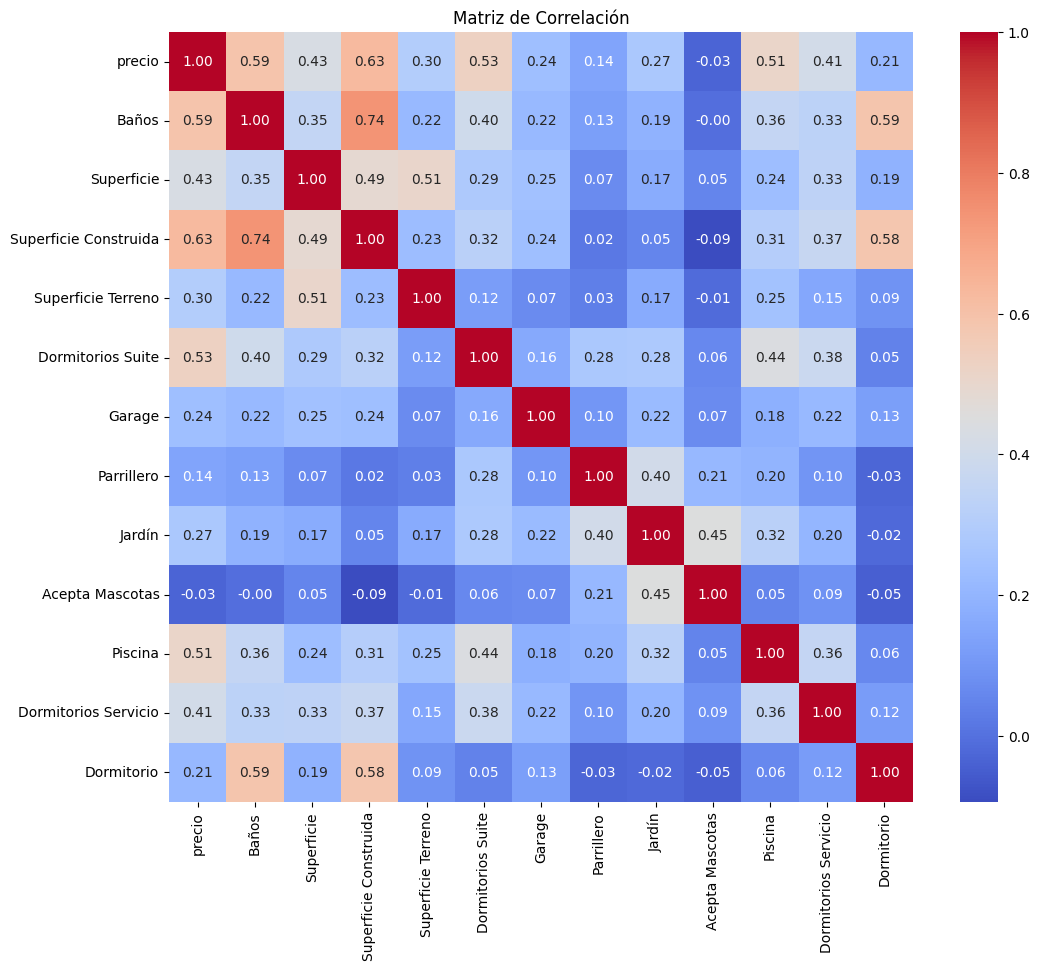

In [53]:
numeric_df = df.select_dtypes(include=['number'])

# Calcula la matriz de correlación usando solo las columnas numéricas
correlation_matrix = numeric_df.corr()

# Crea un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Muestra el gráfico
plt.title('Matriz de Correlación')
plt.show()

## Boxplots

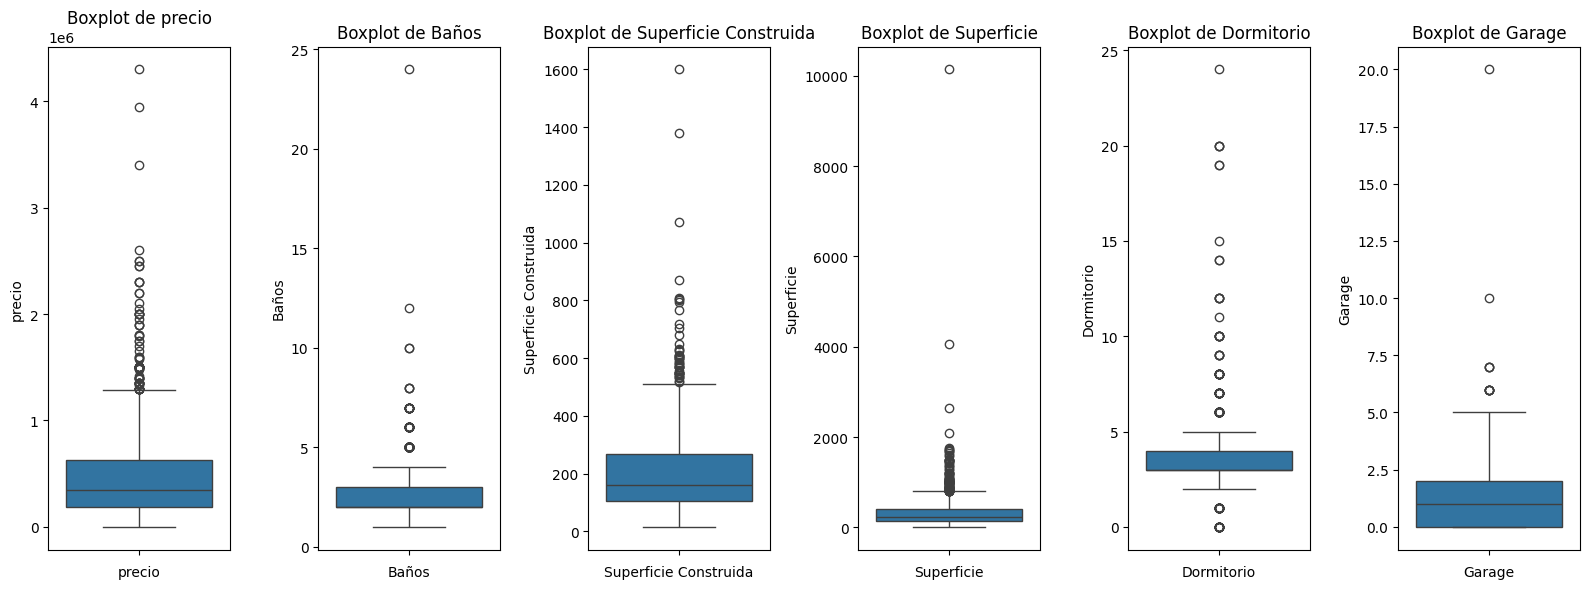

In [63]:
# Lista de las columnas que quieres graficar
columnas_interes = ['precio', 'Baños', 'Superficie Construida', 'Superficie', 'Dormitorio', 'Garage']

# Crear una figura con subgráficos
fig, axes = plt.subplots(1, len(columnas_interes), figsize=(16, 6))

# Iterar sobre las columnas y los ejes para crear un boxplot para cada columna
for ax, col in zip(axes, columnas_interes):
    sns.boxplot(y=df[col], ax=ax)
    ax.set_title(f'Boxplot de {col}')
    ax.set_xlabel(col)

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()